In [1]:
import csv
import numpy as np
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
data = []
with open('linear.txt') as csvfile:
    points = csv.reader(csvfile,delimiter=',')
    for point_str in points:
        data.append(point_str)

In [10]:
data=np.array(data).astype(np.float)
data = np.delete(data, np.s_[4:5], axis=1)
data

array([[ 16.83413438,   2.25005563,  43.9896702 ,  -1.        ],
       [ 16.16018143,   2.52837564,  49.40866435,   1.        ],
       [ 14.80749844,   2.2651013 ,  41.67188983,  -1.        ],
       [ 14.33371275,   1.29106839,  37.98458148,   1.        ],
       [ 13.23638125,   1.00369145,  34.31885796,   1.        ],
       [ 15.96362121,   2.39582104,  46.49306587,   1.        ],
       [ 15.0271781 ,   2.26970918,  37.42651635,  -1.        ],
       [ 13.79970165,   1.241663  ,  35.8448822 ,   1.        ],
       [ 14.7087742 ,   1.15562141,  32.36076251,  -1.        ],
       [ 13.67476111,   1.34204643,  38.98913119,   1.        ],
       [ 16.00677836,   2.35912361,  42.84991323,  -1.        ],
       [ 14.47340337,   2.34436439,  44.79137388,   1.        ],
       [ 16.76727118,   1.8413657 ,  41.36070084,  -1.        ],
       [ 13.06869016,   1.84365927,  37.32692994,   1.        ],
       [ 16.31622364,   1.27203654,  45.09736224,   1.        ],
       [ 15.5063639 ,   2

In [4]:
X = np.delete(data, np.s_[3:4], axis=1)

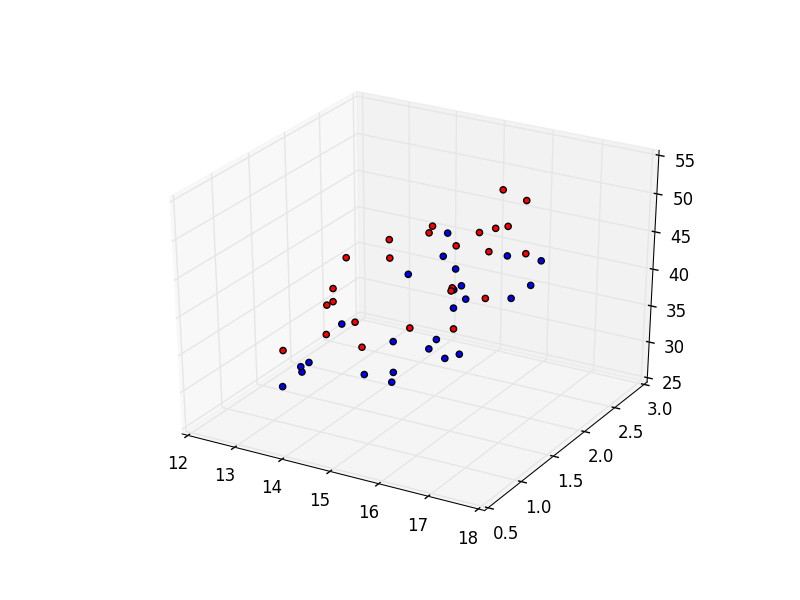

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')
for point in data:
    if (point[3] == -1):
        ax.scatter(point[0], point[1], point[2],c='blue')
    else:
        ax.scatter(point[0], point[1], point[2],c='red')
plt.show()
Image(filename='linear-data[012].png') 

In [11]:
Y = np.delete(data, np.s_[0:3], axis=1).squeeze()
Y

array([-1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,
        1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,
        1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
       -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.])

In [12]:
#replace label y=-1 with y=0
Y[Y < 0] = 0
Y

array([ 0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,
        1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,
        0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.])

In [86]:
#sigmoid function
def sigmoid(theta, x):
    return math.e**(x.dot(theta)) / (1 + math.e**(x.dot(theta)))

In [93]:
#cost function
def calc_cost(theta, x, y):
    h = sigmoid(theta,x)
    total = -(y) * np.log(h) - (1-y) * np.log(1 - h)
    return np.mean(total)

In [136]:
#gradient descent iteration function
def gd(theta, X, Y, rate=.001, converge=.001):
    #normalize
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    #setup cost iter
    cost_iter = []
    cost = calc_cost(theta, X, Y)
    cost_iter.append([0, cost])
    cost_diff = 1
    i = 1
    while(cost_diff > converge):
        old_cost = cost
        theta = theta - (rate * (sigmoid(theta, X) - Y).T.dot(X))
        cost = calc_cost(theta, X, Y)
        cost_iter.append([i, cost])
        cost_diff = old_cost - cost
        i+=1
    return theta, ("iterations: ",i)

In [151]:
#initialize thetas
thetas = np.zeros(X.shape[1])
gd(thetas, X, Y,0.001,0.001)


(array([-0.43471756, -0.19257356,  1.1274259 ]), ('iterations: ', 136))

In [156]:
#get the final theta values
gd(thetas, X, Y,0.1,0.01)

(array([-2.0390762 , -1.63422676,  3.71150381]), ('iterations: ', 11))